<a href="https://colab.research.google.com/github/osamazafar980/Image-Segmentation-Using-K-means-Algorithm/blob/master/K-means-Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
import cv2
import copy

Preprocessing

Image Shape =  (168, 300)
K-mean Centriods:
Centriod 0 0 :  0.9832082406307023
Centriod 0 1 :  0.5114050409849833
Centriod 0 2 :  0.1301975381692339
K-mean Plot clustered pixels are represented with white


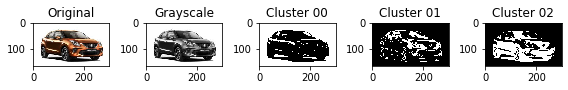

In [103]:
original = cv2.imread('image.jpg')
grayscale = rgb2gray(original)
grayShape = grayscale.shape
print("Image Shape = ",grayShape)
def kmean(cen):
  clusters=centeriod(cen,grayscale)
  clustersIntensities = [[] for _ in range(len(clusters))]
  for number in range(0,len(clusters)):
    for index in range(0,len(clusters[number])):
      clustersIntensities[number].append(grayscale[clusters[number][index][0]][clusters[number][index][1]])
  clustersAvg=[]
  for index in range(0,len(clustersIntensities)):
    clustersAvg.append(np.mean(clustersIntensities[index]))
  return clustersAvg,clusters
#Centriod values ranging from 0.0000-1.00000
cen=[1,0.6,0.2]

clustersAvg,clusters=kmean(cen)
run = True
while(run):
  change=False
  for digit in range(0,len(cen)):
    if(cen[digit]-clustersAvg[digit]>0.00009):
      cen[digit]=clustersAvg[digit]
      change=True
  if(change):
    clustersAvg,clusters=kmean(cen)
  else:
    run=False
fig, axes = plt.subplots(1, len(clustersAvg)+2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")


for number in range(0,len(clusters)):
  clusterGrayscale=copy.deepcopy(grayscale);
  for rows in range(0,grayShape[0]):
    for col in range(0,grayShape[1]):
      clusterGrayscale[rows][col]=0
  for index in range(0,len(clusters[number])):
      clusterGrayscale[clusters[number][index][0]][clusters[number][index][1]]=1
  ax[number+2].imshow(clusterGrayscale,cmap=plt.cm.gray)
  title="Cluster 0"+str(number)
  ax[number+2].set_title(title)
  
  
fig.tight_layout()
print("K-mean Centriods:")
for index in range(0,len(clustersAvg)):
  print("Centriod 0",str(index),": ",str(clustersAvg[index]))

print("K-mean Plot clustered pixels are represented with white")
plt.show()

K-Means

In [0]:
def dist(x,y):
  return abs(x-y)
def genMeanCluster(cen,img):
  meanCluster=[]
  for imageValue in img:
    for imageValues in imageValue:
      meanCluster.append(dist(imageValues,cen))
  return meanCluster
def genCluster(meanClusters):
  clusters = [[] for _ in range(len(meanClusters))]
  for rows in range(0,grayShape[0]):
    for col in range(0,grayShape[1]):
      values=[]
      for num in range(0,len(meanClusters)):
        values.append(meanClusters[num][rows][col])
      minValue=min(values)
      minCluster=0
      for num in range(0,len(meanClusters)):
        if(minValue==meanClusters[num][rows][col]):
          minCluster=num
      clusters[minCluster].append((rows,col))
  return clusters



def centeriod(centeriodValues,img):
  meanCluster=[]
  for cen in centeriodValues:
    meanCluster.append(genMeanCluster(cen,img))
  for index in range(0,len(meanCluster)):
    meanCluster[index]=np.reshape(meanCluster[index],grayShape)
  clusters=genCluster(meanCluster)
  return clusters

